#SINUSOID FUNCTION
We will train a Neural network to predict the amplitud, the period and the phase of a sinusoid function of the form f(A, T, phi)=Asin(2pi/T*t +phi)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#creation of initial parameters
t = np.arange(1, 101, 1)
n = 2000 #number of samples
number_train_data= int(n*0.9*0.7)
number_val_data= int(n*0.9*0.3)
number_test_data = int(n*0.1)

#definition of empty matrices
period = [0 for _ in range(n)]
amplitud = [0 for _ in range(n)]
phase = [0 for _ in range(n)]
x = [[0 for _ in range(100)] for _ in range(n)] #n rows, 100 columns
x = np.array(x).astype("float32")
train_data = np.empty(shape=(number_train_data, 100), dtype='object')
val_data = np.empty(shape=(number_val_data, 100), dtype='object')
test_data = np.empty(shape=(number_test_data, 100), dtype='object')
input_data=[]

train_labels1=[]
train_labels2=[]
train_labels3=[]

val_labels1=[]
val_labels2=[]
val_labels3=[]

test_labels1=[]
test_labels2=[]
test_labels3=[]

In [ ]:
#creation of input data
for i in range(n):
  amplitud[i] = np.random.uniform(1, 10)
  period[i] = np.random.uniform(5,50)
  phase[i] = np.random.uniform(0, 360)

for i in range(n):
  for j in range(100):
    x[i,j] = amplitud[i] * np.sin(2. * np.pi * (t[j] / period[i] + phase[i] / 360.))

for i in range(number_train_data):
  for j in range(100):
    train_data[i][j]=x[i,j]

for i in range(number_train_data, number_train_data+number_val_data):
  for j in range(100):
    val_data[i-number_train_data][j]=x[i,j]

for i in range(number_train_data+number_val_data, n):
  for j in range(100):
    test_data[i-number_train_data-number_val_data][j]=x[i,j]

train_data = np.array(train_data).astype('float32')
val_data = np.array(val_data).astype('float32')
test_data = np.array(test_data).astype('float32')

train_data = train_data[~np.isnan(train_data)]
val_data = val_data[~np.isnan(val_data)]
test_data = test_data[~np.isnan(test_data)]

train_data = train_data.reshape((len(train_data)//100,100*1)).astype('float32')
val_data = val_data.reshape((len(val_data)//100,100*1)).astype('float32')
test_data = test_data.reshape((len(test_data)//100,100*1)).astype('float32')

input_data=np.concatenate((train_data,val_data,test_data), axis=None).astype('float32')

#min-max normalisation
train_data = (train_data-np.min(input_data))/(np.max(input_data)-np.min(input_data))
val_data = (val_data-np.min(input_data))/(np.max(input_data)-np.min(input_data))
test_data = (test_data-np.min(input_data))/(np.max(input_data)-np.min(input_data))

train_data = train_data.reshape((-1, 1, 100))
test_data = test_data.reshape((-1, 1, 100))
val_data = val_data.reshape((-1, 1, 100))

train_data = tf.stack(train_data)
val_data= tf.stack(val_data)
test_data= tf.stack(test_data)

In [ ]:
#min-max normalisation
amplitud = (amplitud-np.min(amplitud))/(np.max(amplitud)-np.min(amplitud))
period = (period-np.min(period))/(np.max(period)-np.min(period))
phase = (phase-np.min(phase))/(np.max(phase)-np.min(phase))

In [ ]:
for i in range (number_train_data):
    train_labels1.append(period[i])
    train_labels2.append(amplitud[i])
    train_labels3.append(phase[i])

for i in range(number_train_data, number_train_data+number_val_data):
    val_labels1.append(period[i])
    val_labels2.append(amplitud[i])
    val_labels3.append(phase[i])

for i in range(number_train_data+number_val_data, n):
    test_labels1.append(period[i])
    test_labels2.append(amplitud[i])
    test_labels3.append(phase[i])

In [ ]:
test_labels = np.column_stack((np.array(test_labels1).astype("float32"), np.array(test_labels2).astype("float32"), np.array(test_labels3).astype("float32")))
train_labels = np.column_stack((np.array(train_labels1).astype("float32"), np.array(train_labels2).astype("float32"), np.array(train_labels3).astype("float32")))
val_labels = np.column_stack((np.array(val_labels1).astype("float32"), np.array(val_labels2).astype("float32"), np.array(val_labels3).astype("float32")))

In [ ]:
#neural network
model = keras.Sequential([
    layers.InputLayer(input_shape=(1, 100)),
    layers.Conv1D(4, kernel_size=3, activation='linear', padding='same'),
    layers.Conv1D(12, kernel_size=3, activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(150, activation='relu'),
    layers.Dense(150, activation='relu'),
    layers.Dense(3, activation='linear')
])

In [ ]:
model.compile(optimizer="adam", loss="mse") #mse=mean squared error

In [ ]:
history = model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=100, batch_size=64) #training process

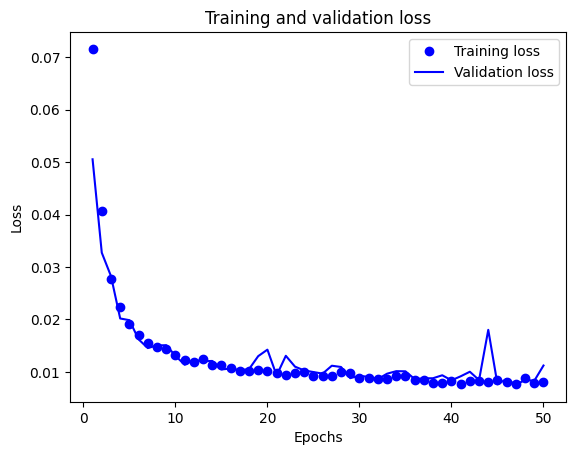

In [ ]:
#evolution of losses
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
#predictions
predictions = model.predict(test_data)

7/7 [==============================] - 0s 2ms/step


Visualising predictions

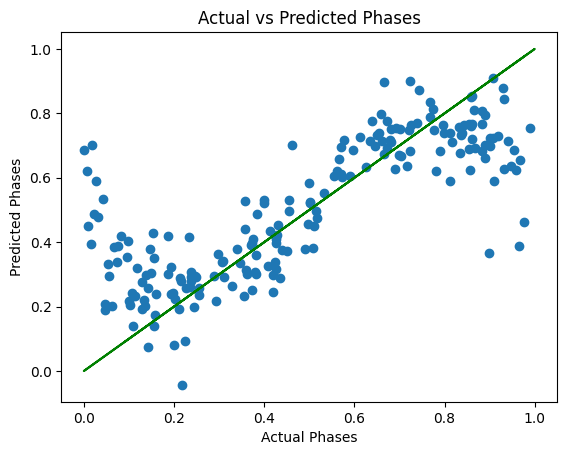

In [ ]:
test_T = [[0 for _ in range(1)] for _ in range(number_test_data)]
test_A = [[0 for _ in range(1)] for _ in range(number_test_data)]
test_P = [[0 for _ in range(1)] for _ in range(number_test_data)]


for i in range(number_test_data):
  test_T[i]=test_labels[i,0]
  test_A[i]=test_labels[i,1]
  test_P[i]=test_labels[i,2]


test_T = np.array(test_T)
test_A = np.array(test_A)
test_P = np.array(test_P)

plt.plot(train_labels[:,2], train_labels[:,2], color='green')
plt.scatter(test_P, predictions[:,2])
plt.xlabel('Actual Phases')
plt.ylabel('Predicted Phases')
plt.title('Actual vs Predicted Phases')

plt.show()

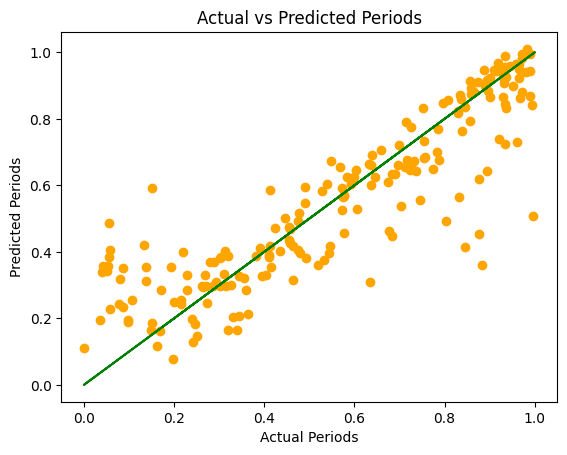

In [ ]:
plt.scatter(test_T, predictions[:,0], color='orange')
plt.plot(train_labels[:,0], train_labels[:,0], color='green')
plt.xlabel('Actual Periods')
plt.ylabel('Predicted Periods')
plt.title('Actual vs Predicted Periods')


plt.show()

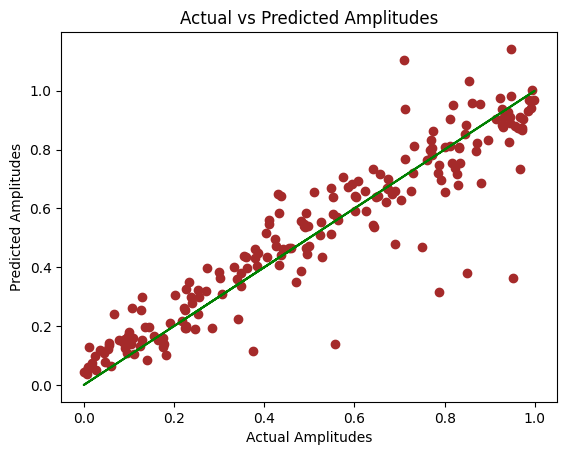

In [ ]:
plt.plot(train_labels[:,1], train_labels[:,1], color='green')
plt.scatter(test_A, predictions[:,1],color='brown')
plt.xlabel('Actual Amplitudes')
plt.ylabel('Predicted Amplitudes')
plt.title('Actual vs Predicted Amplitudes')

plt.show()

Visualising filters

In [ ]:
for layer in model.layers:
  if 'conv' not in layer.name:
    continue

  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)


conv1d_2 (3, 100, 4)
conv1d_3 (3, 4, 12)


In [ ]:
filters, biases = model.layers[0].get_weights()#we choose the first layer

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
n_filters=4
fig, axs = plt.subplots(n_filters, 4, figsize=(12, 8))

for i in range(n_filters):
    f = filters[:, :, i]

    for j in range(1):
        ax = axs[i, j]
        ax.set_xlabel('x')
        ax.set_ylabel('Value of filter')
        ax.set_ylim(0,1)
        ax.plot(f[:, 0])

plt.tight_layout()
plt.show()